In [1]:
library(tidyverse)
library(stringr) 
library(plotly)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
##############################################################################

##########################     INPUT PARAMETERS    ###########################

##############################################################################



# filetype = # "ratio_all_germline_singletons_excluded_tumor_4_cs" # # "ratio_singletons_excluded_tumor_4_cs" # "ratio" 
filetype = "ratio"

# input_folder =   "ci5_cs1e9" # "all_germline_ci5_cs1e9" # "all_germline_filtered_bams_tumor_ci5_cs1e9" # "all_germline_filtered_bams_tumor_subtract_other_tumor_ci5_cs1e9", all_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA
# all_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA # de_novo_germline
input_folder = "all_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA_subtracted_kmers_not_seen"

# output_folder =  "ci5_cs1e9" # "union_germline_ci4_cs1e9" # "union_germline_filtered_tumor_bams_ci5_cs1e9" # "union_germline_filtered_tumor_bams_subtract_other_tumors_ci5_cs1e9"
# union_germline_filtered_tumor_bams_ci5_cs1e9_filtered_cfDNA # de_novo_germline
output_folder = "union_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA_subtracted_kmers_not_seen"


In [3]:
paramspace = read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv")

paramspace  <- paramspace %>% rename(patient_id = pt_id)
head(paramspace)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450


In [4]:
SAMPLES = paramspace["patient_id"]
FOLDERS = paramspace["cfDNA_folder"]

In [5]:
paramspace["big_ratio"] <- NA
paramspace["big_ratio_CI_lower"] <- NA
paramspace["big_ratio_CI_upper"] <- NA

paramspace["small_ratio"] <- NA
paramspace["small_ratio_CI_lower"] <- NA
paramspace["small_ratio_CI_upper"] <- NA

#paramspace["big_upper_ratio"] <- NA
#paramspace["big_upper_ratio_CI_lower"] <- NA
#paramspace["big_upper_ratio_CI_upper"] <- NA

for (row in 1:nrow(paramspace)){
    pt = paramspace[row, "patient_id"]
    #print(pt)
    fd = paramspace[row, "cfDNA_folder"]
    big_r = read.csv(paste("../data/", pt, "/" , fd, "/", input_folder, "/", "big_", filetype, ".csv", sep = ""))
    #upper_r = read.csv(paste("../data/", pt, "/" , fd, "/", input_folder, "/", "big_upper_", filetype, ".csv", sep = ""))
    small_r = read.csv(paste("../data/", pt, "/", fd, "/", input_folder, "/", "small_", filetype, ".csv", sep = ""))
    #print(big_r[[1]])
    #print(small_r[[1]])
    paramspace[row, "big_ratio"] = big_r$ratio
    paramspace[row, "big_ratio_CI_lower"] = big_r$lower_CI
    paramspace[row, "big_ratio_CI_upper"] = big_r$upper_CI

    #paramspace[row, "big_upper_ratio"] = upper_r$ratio
    #paramspace[row, "big_upper_ratio_CI_lower"] = upper_r$lower_CI
    #paramspace[row, "big_upper_ratio_CI_upper"] = upper_r$upper_CI
    
    paramspace[row, "small_ratio"] = small_r$ratio
    paramspace[row, "small_ratio_CI_lower"] = small_r$lower_CI
    paramspace[row, "small_ratio_CI_upper"] = small_r$upper_CI
}

In [6]:
res <- paramspace

In [7]:
#res <- res %>% separate(cfDNA_folder, c("sampleID", "sample_type", "sample_number"))
res <- res %>% 
  mutate(tmp_chunks = stringr::str_split(cfDNA_folder, stringr::fixed("_"),  n = 3)) %>%
  mutate(sampleID = map_chr(tmp_chunks, 1),
         sub_value = map_chr(tmp_chunks, 2), 
         sub_val = map_chr(tmp_chunks, 3)) %>%
  select(-c(tmp_chunks, sub_value, sub_val))


In [8]:
sample_timepoint <- read.csv("../data/metadata/clin_data/sample_timepoint_formatted.csv")

In [9]:
head(sample_timepoint)
sample_timepoint_days <- sample_timepoint %>% filter(phase == "phaseI")
sample_timepoint_days <- sample_timepoint_days %>% select(sampleID, sample_timepoint_days_since_OP)
sample_timepoint_days %>% filter(is.na(sample_timepoint_days_since_OP))

biobankID,sample_timepoint_days_since_OP,phase,patient_id,sampleID
1982,-6,phaseII,C01982,C84A01982D
1982,15,phaseII,C01982,C85A01982D
1982,142,phaseII,C01982,C86A01982D
1982,241,phaseII,C01982,C87A01982D
3736,-1,phaseII,C03736,C211A03736D
3736,43,phaseII,C03736,C212A03736D


sampleID,sample_timepoint_days_since_OP


In [10]:
res$sampleID <- as.character(res$sampleID)
res <- left_join(res, sample_timepoint_days, by = c("sampleID"))

In [11]:
clinical_data <- read.csv("../data/metadata/clin_data/clinical_data_formatted.csv")
clinical_data_relapse <- clinical_data %>% select(patient_id, time_to_relapse_days, adjuvant_chemo_start_days, adjuvant_chemo_end_days)

In [12]:
res <-left_join(res, clinical_data_relapse, by="patient_id")

In [13]:
res <- res %>% select(patient_id, cfDNA_folder, sampleID, sample_timepoint_days_since_OP, time_to_relapse_days, big_ratio, small_ratio) #, big_upper_ratio

In [14]:
patients <- as.character(unique(res$patient_id))
res_new <- NULL

for (i in patients){
    patient <- res %>% filter(patient_id == i)
    #print(patient)
    if(is.na(sum(patient$time_to_relapse_days))){
        new_row = patient %>% filter(sample_timepoint_days_since_OP == max(sample_timepoint_days_since_OP))
    }else{
        relapse_timepoint = min(patient$time_to_relapse_days, na.rm=TRUE)
        before_relapse = patient %>% filter(sample_timepoint_days_since_OP < time_to_relapse_days)
        #print(before_relapse)
        new_row = before_relapse %>% filter(sample_timepoint_days_since_OP == max(sample_timepoint_days_since_OP))}
    
    res_new = bind_rows(res_new, new_row)
    }


In [15]:
res_new

patient_id,cfDNA_folder,sampleID,sample_timepoint_days_since_OP,time_to_relapse_days,big_ratio,small_ratio
C04689,C312A04689D_cfdna_N295-162,C312A04689D,1085,NA,0.0482124201,0.0620814697
C04816,C283A04816D_cfdna_N295-196,C283A04816D,1084,NA,0.0051435104,0.0253670996
C04837,C248A04837D_cfdna_N295-202,C248A04837D,1104,NA,0.0774423921,0.1123928324
C04849,C256A04849D_cfdna_N295-115,C256A04849D,323,362.2063,0.0009348381,0.0040164520
C04873,C211A04873D_cfdna_N295-206,C211A04873D,1092,NA,0.0022686821,0.0082469063
C04874,C189A04874D_cfdna_N295-121,C189A04874D,366,395.6875,0.0418708730,0.0611015327
C04886,C274A04886D_cfdna_N295-204,C274A04886D,1068,NA,0.0020632382,0.0063257505
C04887,C243A04887D_cfdna_N295-231,C243A04887D,1082,NA,0.1096845283,0.1531426063
C05048,C284A05048D_cfdna_N295-210,C284A05048D,1057,NA,0.0004588577,0.0007582874
C05073,C234A05073D_cfdna_N295-212,C234A05073D,1079,NA,0.0284720314,0.0454847174


In [16]:
res_new <- res_new %>% mutate(sample_label = "last_before_relapse")

In [17]:
res_new <- res_new %>% select(patient_id, cfDNA_folder, sampleID, big_ratio, small_ratio, sample_timepoint_days_since_OP, sample_label) #big_upper_ratio,

In [18]:
res_new

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label
C04689,C312A04689D_cfdna_N295-162,C312A04689D,0.0482124201,0.0620814697,1085,last_before_relapse
C04816,C283A04816D_cfdna_N295-196,C283A04816D,0.0051435104,0.0253670996,1084,last_before_relapse
C04837,C248A04837D_cfdna_N295-202,C248A04837D,0.0774423921,0.1123928324,1104,last_before_relapse
C04849,C256A04849D_cfdna_N295-115,C256A04849D,0.0009348381,0.0040164520,323,last_before_relapse
C04873,C211A04873D_cfdna_N295-206,C211A04873D,0.0022686821,0.0082469063,1092,last_before_relapse
C04874,C189A04874D_cfdna_N295-121,C189A04874D,0.0418708730,0.0611015327,366,last_before_relapse
C04886,C274A04886D_cfdna_N295-204,C274A04886D,0.0020632382,0.0063257505,1068,last_before_relapse
C04887,C243A04887D_cfdna_N295-231,C243A04887D,0.1096845283,0.1531426063,1082,last_before_relapse
C05048,C284A05048D_cfdna_N295-210,C284A05048D,0.0004588577,0.0007582874,1057,last_before_relapse
C05073,C234A05073D_cfdna_N295-212,C234A05073D,0.0284720314,0.0454847174,1079,last_before_relapse


In [19]:
phase_I_pts = c('C04689', 'C04816', 'C04837', 'C04849', 'C04873', 'C04874', 'C04886', 'C04887', 'C05048', 'C05073', 'C05084', 'C05118', 'C05194', 'C05234', 'C05703')

res_min <- NULL
for (pt in phase_I_pts){
    res_pt <- res %>% filter(patient_id == pt)
    res_pt$sample_timepoint_days_since_OP <- as.numeric(res_pt$sample_timepoint_days_since_OP)
    
    # order based on sample timepoint
    res_pt <- res_pt %>% arrange(sample_timepoint_days_since_OP)
    head(res_pt)
    
    # pick first 2
    res_pt <- res_pt[1:2, ]
    print(dim(res_pt))
    
    res_pt <- res_pt %>% mutate(sample_label = c("pre-op", "post-op"))
    
    # save to res min
    res_min <- rbind(res_min, res_pt)
    
    }

res_min <- res_min %>% select(patient_id, cfDNA_folder, sampleID, big_ratio, small_ratio, sample_timepoint_days_since_OP, sample_label) #big_upper_ratio, 

[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7
[1] 2 7


In [20]:
res_three_points <- bind_rows(res_min, res_new)

In [21]:
res_three_points

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.0492302237,0.0692874065,-1,pre-op
C04689,C300A04689D_cfdna_N295-100,C300A04689D,0.0483370416,0.0638325898,37,post-op
C04816,C270A04816D_cfdna_N295-104,C270A04816D,0.0047273839,0.0237462918,-6,pre-op
C04816,C271A04816D_cfdna_N295-105,C271A04816D,0.0065026505,0.0352727000,27,post-op
C04837,C237A04837D_cfdna_N295-61,C237A04837D,0.0822604481,0.1121093330,-1,pre-op
C04837,C238A04837D_cfdna_N295-63,C238A04837D,0.0861102340,0.1104767677,47,post-op
C04849,C252A04849D_cfdna_N295-64,C252A04849D,0.0034770310,0.0155747857,0,pre-op
C04849,C253A04849D_cfdna_N295-62,C253A04849D,0.0008092426,0.0032495745,42,post-op
C04873,C75A04873D_cfdna_N295-219,C75A04873D,0.0033857408,0.0120170484,-1,pre-op
C04873,C206A04873D_cfdna_N295-74,C206A04873D,0.0011497267,0.0034749708,83,post-op


In [22]:
normalized_res <- data.frame(matrix(ncol = ncol(res_three_points)+2, nrow = 0))
colnames(normalized_res) <- c(colnames(res_three_points), "big_ratio_normalized", "small_ratio_normalized") #, "big_upper_ratio_normalized"

In [23]:
patients = as.character(unique(res_three_points$patient_id))

In [24]:
for (i in patients){
    res_pt <- res_three_points %>% filter(patient_id == i)
    
    for (x in res_pt$cfDNA_folder){
        sample_label_check <- res_pt %>% filter(cfDNA_folder == x)
        
        if (sample_label_check$sample_label == "pre-op"){
            pre_val_big = sample_label_check$big_ratio
            #pre_val_big_upper = sample_label_check$big_upper_ratio
            pre_val_small = sample_label_check$small_ratio}}
    
    for (j in res_pt$cfDNA_folder){
        normalized_line <- res_pt %>% filter(cfDNA_folder == j)
        #print(normalized_line)
        normalized_line <- normalized_line %>% mutate(big_ratio_normalized = big_ratio/pre_val_big, small_ratio_normalized = small_ratio/pre_val_small) #, big_upper_ratio_normalized = big_upper_ratio/pre_val_big_upper
        #print(normalized_line)
        normalized_res[nrow(normalized_res)+1,] = c(i, j, normalized_line[3:9])
    
    }}

In [25]:
normalized_res <- normalized_res %>% mutate(pre_post_time = ifelse(sample_label == "pre-op", 0, sample_timepoint_days_since_OP))

In [26]:
Correlations <- read.csv("../data/ci5_cs1e9_correlation.csv")
relapse_label <- Correlations %>% select(pt_id, Relapse)
colnames(relapse_label) <- c("patient_id", "Relapse_label")
normalized_res <- left_join(normalized_res, relapse_label, by="patient_id")

In [27]:
normalized_res

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label,big_ratio_normalized,small_ratio_normalized,pre_post_time,Relapse_label
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0000000,1.0000000,0,No_relapse


In [28]:
normalized_res_without_post_op <- normalized_res %>% filter(sample_label != "post-op")

## Normalized plots pre_op pre_relapse/last sample

In [30]:
quick_plot_big_r_normalized <- ggplot(normalized_res_without_post_op) + 
    geom_line(aes(x = pre_post_time, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = log10(big_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Normalized_big_", filetype, ".png", sep = ""),
  quick_plot_big_r_normalized, dpi = "print")

Saving 6.67 x 6.67 in image


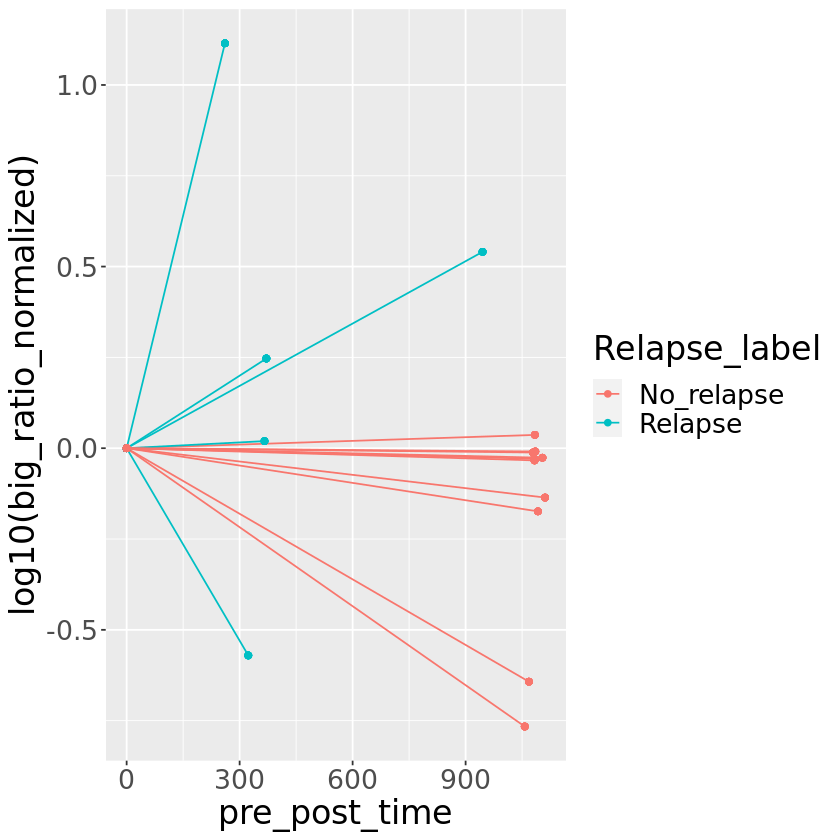

In [31]:
quick_plot_big_r_normalized

In [32]:
#quick_plot_big_upper_r_normalized <- ggplot(normalized_res_without_post_op) + 
#    geom_line(aes(x = pre_post_time, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id)) + 
#    geom_point(aes(x = pre_post_time, y = log10(big_upper_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

#ggsave(
#  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Normalized_big_upper_", filetype, ".png", sep = ""),
#  quick_plot_big_upper_r_normalized, dpi = "print")

In [33]:
#quick_plot_big_upper_r_normalized

In [34]:
quick_plot_small_r_normalized <- ggplot(normalized_res_without_post_op) + 
    geom_line(aes(x = pre_post_time, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = log10(small_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 


ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Normalized_small_", filetype, ".png", sep = ""),
  quick_plot_small_r_normalized, dpi = "print")

Saving 6.67 x 6.67 in image


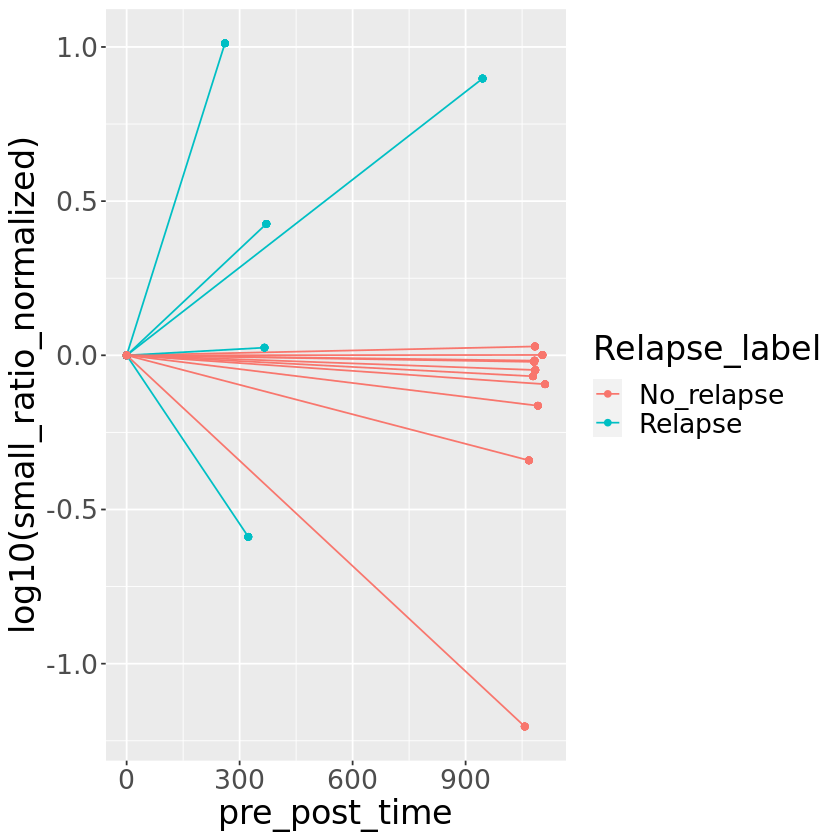

In [35]:
quick_plot_small_r_normalized

## Not normalized plots pre_op pre_relapse/last sample

In [36]:
quick_plot_big_r <- ggplot(normalized_res_without_post_op) + 
    geom_line(aes(x = pre_post_time, y = big_ratio, color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = big_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Big_", filetype, ".png", sep = ""),
  quick_plot_big_r, dpi = "print")

Saving 6.67 x 6.67 in image


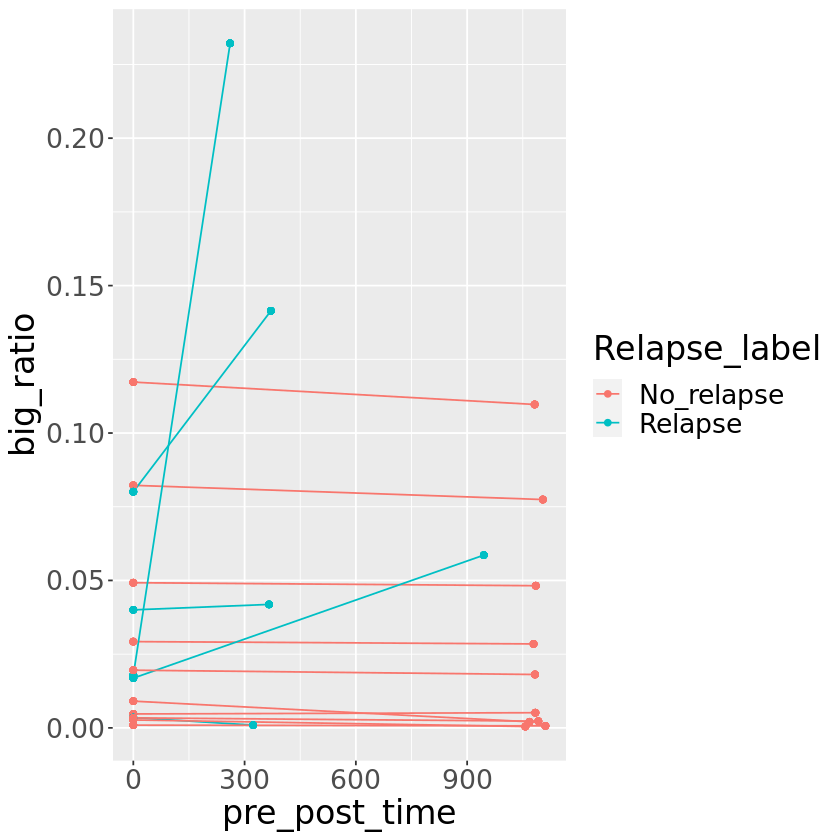

In [37]:
quick_plot_big_r

In [38]:
#quick_plot_big_upper_r <- ggplot(normalized_res_without_post_op) + 
#    geom_line(aes(x = pre_post_time, y = big_upper_ratio, color = Relapse_label, group=patient_id)) + 
#    geom_point(aes(x = pre_post_time, y = big_upper_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

#ggsave(
#  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Big_upper_", filetype, ".png", sep = ""),
#  quick_plot_big_upper_r, dpi = "print")

In [39]:
#quick_plot_big_upper_r

In [40]:
quick_plot_small_r <- ggplot(normalized_res_without_post_op) + 
    geom_line(aes(x = pre_post_time, y = small_ratio, color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = small_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 


ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Small_", filetype, ".png", sep = ""),
  quick_plot_small_r, dpi = "print")

Saving 6.67 x 6.67 in image


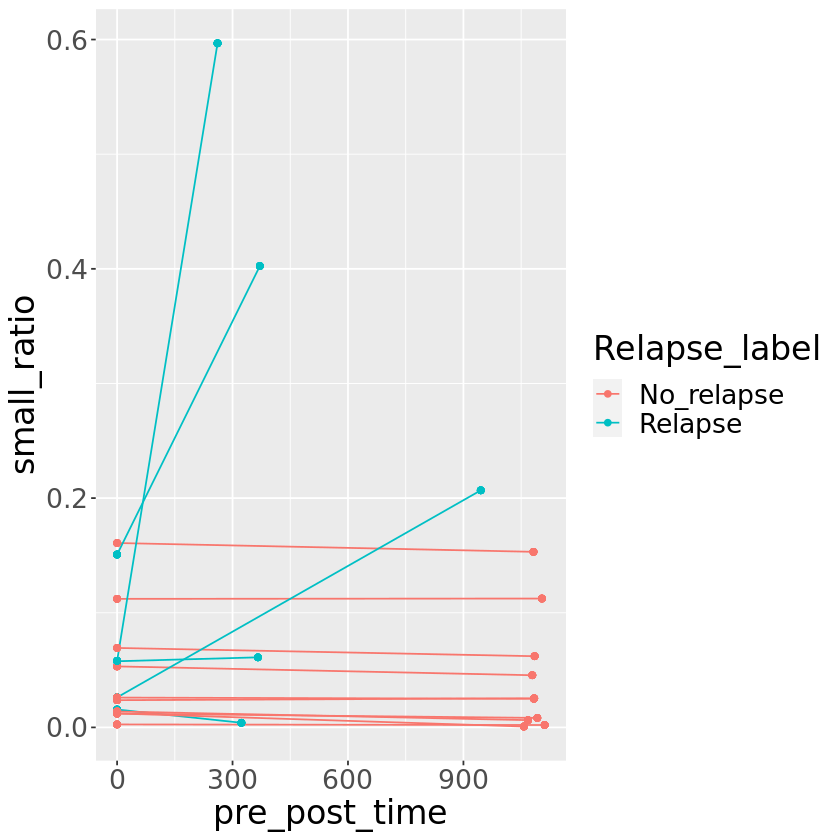

In [41]:
quick_plot_small_r

## Normalized plots pre-op + post-op + pre_relapse/last sample

In [42]:
normalized_bt_post_op_res <- data.frame(matrix(ncol = ncol(res_three_points)+2, nrow = 0))
colnames(normalized_bt_post_op_res) <- c(colnames(res_three_points), "big_ratio_normalized", "small_ratio_normalized") #, "big_upper_ratio_normalized"

In [43]:
normalized_bt_post_op_res

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label,big_ratio_normalized,small_ratio_normalized


In [44]:
patients = as.character(unique(res_three_points$patient_id))

In [45]:
for (i in patients){
    res_pt <- res_three_points %>% filter(patient_id == i)
    
    for (x in res_pt$cfDNA_folder){
        sample_label_check <- res_pt %>% filter(cfDNA_folder == x)
        
        if (sample_label_check$sample_label == "post-op"){
            pre_val_big = sample_label_check$big_ratio
            #pre_val_big_upper = sample_label_check$big_upper_ratio
            pre_val_small = sample_label_check$small_ratio}}
    
    for (j in res_pt$cfDNA_folder){
        normalized_line <- res_pt %>% filter(cfDNA_folder == j)
        #print(normalized_line)
        normalized_line <- normalized_line %>% mutate(big_ratio_normalized = big_ratio/pre_val_big, small_ratio_normalized = small_ratio/pre_val_small) #, big_upper_ratio_normalized = big_upper_ratio/pre_val_big_upper
        #print(normalized_line)
        normalized_bt_post_op_res[nrow(normalized_bt_post_op_res)+1,] = c(i, j, normalized_line[3:9])
    
    }}

In [46]:
normalized_bt_post_op_res

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label,big_ratio_normalized,small_ratio_normalized
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.0492302237,0.0692874065,-1,pre-op,1.0184782,1.0854550
C04689,C300A04689D_cfdna_N295-100,C300A04689D,0.0483370416,0.0638325898,37,post-op,1.0000000,1.0000000
C04689,C312A04689D_cfdna_N295-162,C312A04689D,0.0482124201,0.0620814697,1085,last_before_relapse,0.9974218,0.9725670
C04816,C270A04816D_cfdna_N295-104,C270A04816D,0.0047273839,0.0237462918,-6,pre-op,0.7269934,0.6732201
C04816,C271A04816D_cfdna_N295-105,C271A04816D,0.0065026505,0.0352727000,27,post-op,1.0000000,1.0000000
C04816,C283A04816D_cfdna_N295-196,C283A04816D,0.0051435104,0.0253670996,1084,last_before_relapse,0.7909867,0.7191709
C04837,C237A04837D_cfdna_N295-61,C237A04837D,0.0822604481,0.1121093330,-1,pre-op,0.9552924,1.0147775
C04837,C238A04837D_cfdna_N295-63,C238A04837D,0.0861102340,0.1104767677,47,post-op,1.0000000,1.0000000
C04837,C248A04837D_cfdna_N295-202,C248A04837D,0.0774423921,0.1123928324,1104,last_before_relapse,0.8993402,1.0173436
C04849,C252A04849D_cfdna_N295-64,C252A04849D,0.0034770310,0.0155747857,0,pre-op,4.2966485,4.7928693


In [47]:
normalized_bt_post_op_res <- normalized_bt_post_op_res %>% mutate(pre_post_time = ifelse(sample_label == "pre-op", 0, sample_timepoint_days_since_OP))

In [48]:
Correlations <- read.csv("../data/ci5_cs1e9_correlation.csv")
relapse_label <- Correlations %>% select(pt_id, Relapse)
colnames(relapse_label) <- c("patient_id", "Relapse_label")
normalized_bt_post_op_res <- left_join(normalized_bt_post_op_res, relapse_label, by="patient_id")

In [49]:
normalized_bt_post_op_res

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label,big_ratio_normalized,small_ratio_normalized,pre_post_time,Relapse_label
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse


In [50]:
normalized_bt_post_op_res

patient_id,cfDNA_folder,sampleID,big_ratio,small_ratio,sample_timepoint_days_since_OP,sample_label,big_ratio_normalized,small_ratio_normalized,pre_post_time,Relapse_label
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse
C04689,C299A04689D_cfdna_N295-99,C299A04689D,0.04923022,0.06928741,-1,pre-op,1.0184782,1.085455,0,No_relapse


In [51]:
normalized_bt_post_op_res <- unique(normalized_bt_post_op_res)

In [52]:
normalized_bt_post_op_res_without_pre <- normalized_bt_post_op_res %>% filter(sample_label != "pre-op")

In [53]:
quick_plot_big_r_normalized <- ggplot(normalized_bt_post_op_res_without_pre) + 
    geom_line(aes(x = pre_post_time, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = log10(big_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Post_op_pre_relapse_normalized_Big_", filetype, ".png", sep = ""),
  quick_plot_big_r_normalized, dpi = "print")

Saving 6.67 x 6.67 in image


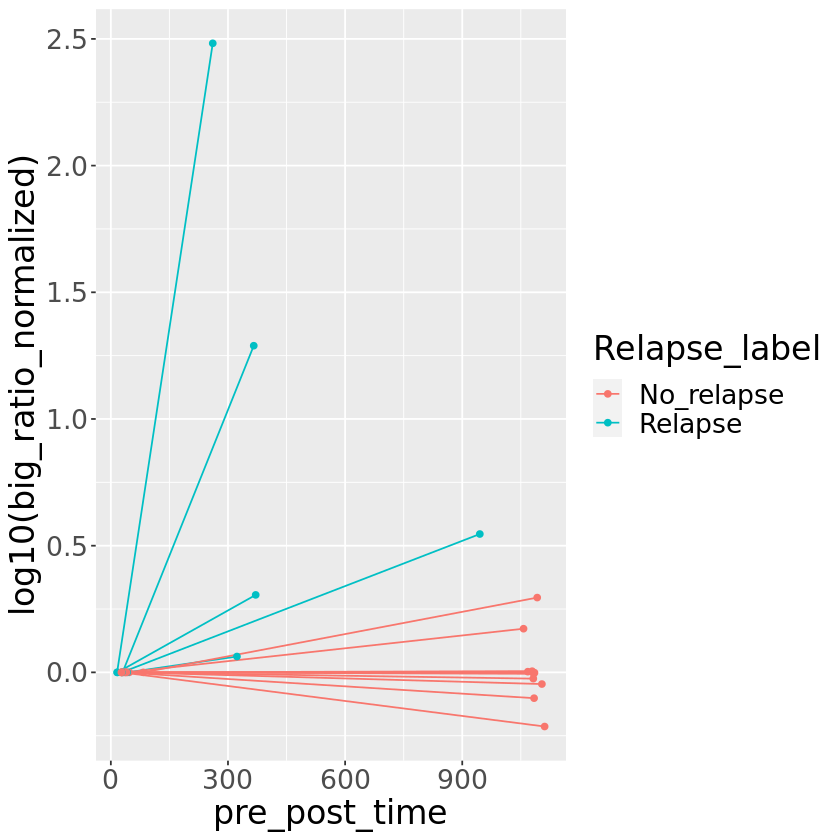

In [54]:
quick_plot_big_r_normalized

In [55]:
#quick_plot_big_upper_r_normalized <- ggplot(normalized_bt_post_op_res_without_pre) + 
#    geom_line(aes(x = pre_post_time, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id)) + 
#    geom_point(aes(x = pre_post_time, y = log10(big_upper_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

#ggsave(
#  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Post_op_pre_relapse_normalized_Big_upper_", filetype, ".png", sep = ""),
#  quick_plot_big_upper_r_normalized, dpi = "print")

In [56]:
#quick_plot_big_upper_r_normalized

In [57]:
quick_plot_small_r_normalized <- ggplot(normalized_bt_post_op_res_without_pre) + 
    geom_line(aes(x = pre_post_time, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = log10(small_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Post_op_pre_relapse_normalized_Small_", filetype, ".png", sep = ""),
  quick_plot_small_r_normalized, dpi = "print")

Saving 6.67 x 6.67 in image


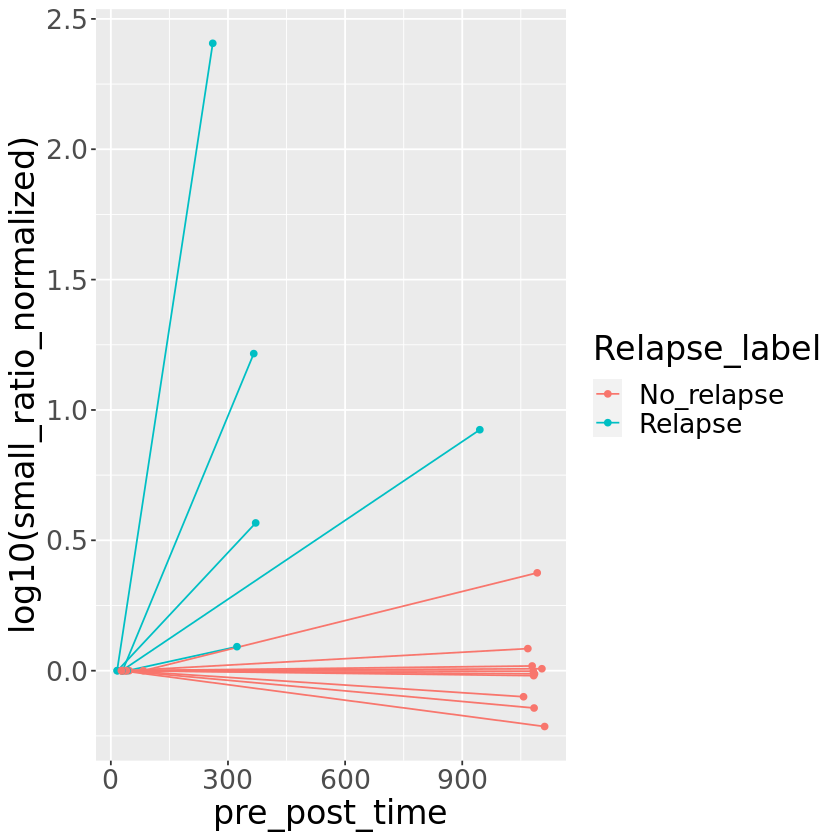

In [58]:
quick_plot_small_r_normalized

In [59]:
quick_plot_big_r <- ggplot(normalized_bt_post_op_res_without_pre) + 
    geom_line(aes(x = pre_post_time, y = big_ratio, color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = big_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Post_op_pre_relapse_Big_", filetype, ".png", sep = ""),
  quick_plot_big_r, dpi = "print")

Saving 6.67 x 6.67 in image


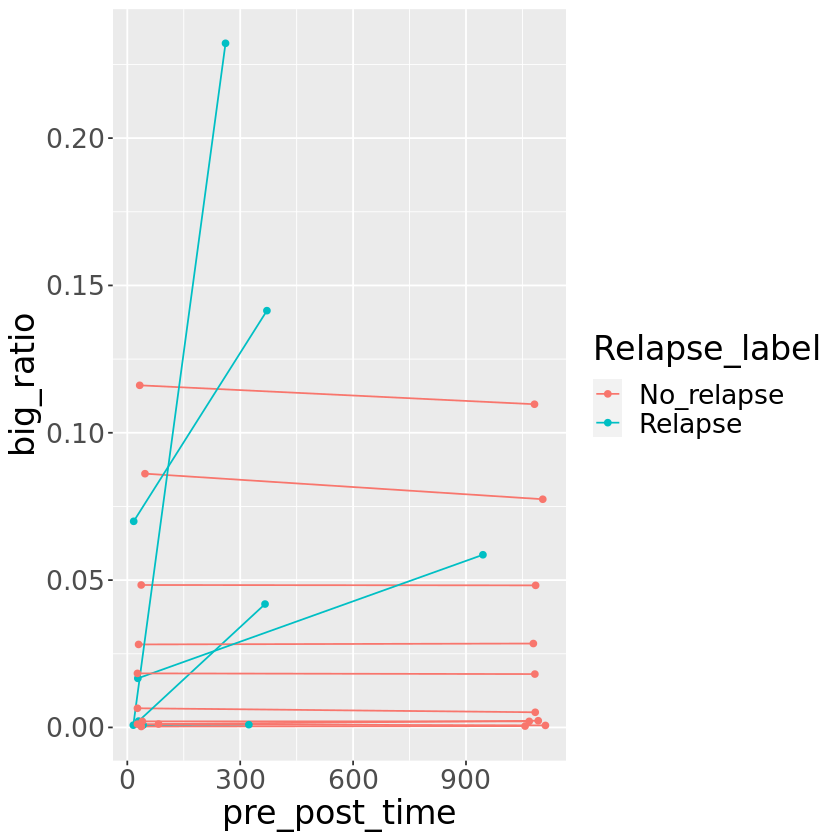

In [60]:
quick_plot_big_r

In [61]:
#quick_plot_big_upper_r <- ggplot(normalized_bt_post_op_res_without_pre) + 
#    geom_line(aes(x = pre_post_time, y = big_upper_ratio, color = Relapse_label, group=patient_id)) + 
#    geom_point(aes(x = pre_post_time, y = big_upper_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

#ggsave(
#  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Post_op_pre_relapse_Big_upper_", filetype, ".png", sep = ""),
#  quick_plot_big_upper_r, dpi = "print")

In [62]:
#quick_plot_big_upper_r

In [63]:
quick_plot_small_r <- ggplot(normalized_bt_post_op_res_without_pre) + 
    geom_line(aes(x = pre_post_time, y = small_ratio, color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = small_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Post_op_pre_relapse_Small_", filetype, ".png", sep = ""),
  quick_plot_small_r, dpi = "print")

Saving 6.67 x 6.67 in image


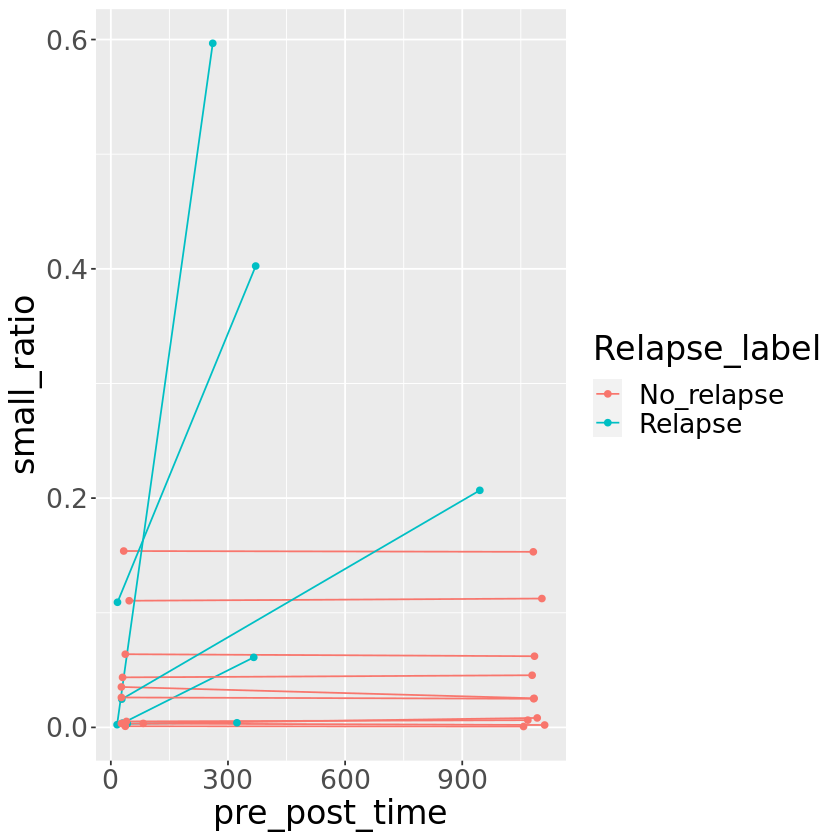

In [64]:
quick_plot_small_r

## With all thre data points

In [65]:
quick_plot_big_r_normalized <- ggplot(normalized_bt_post_op_res) + 
    geom_line(aes(x = pre_post_time, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = log10(big_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Pre_op_post_op_pre_relapse_normalized_Big_", filetype, ".png", sep = ""),
  quick_plot_big_r_normalized, dpi = "print")

Saving 6.67 x 6.67 in image


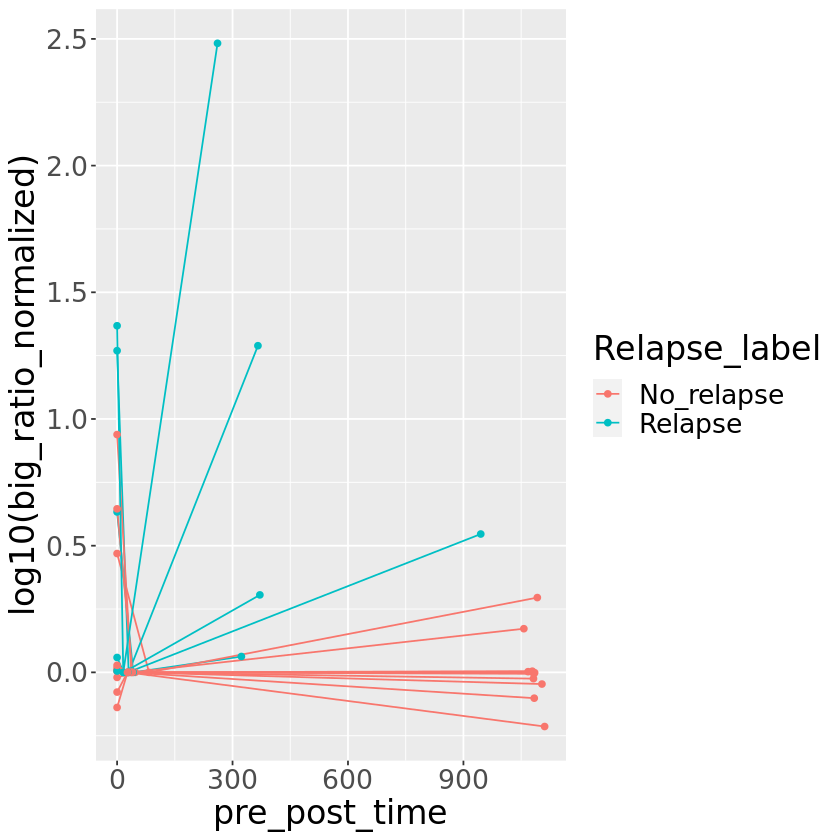

In [66]:
quick_plot_big_r_normalized

In [67]:
#quick_plot_big_upper_r_normalized <- ggplot(normalized_bt_post_op_res) + 
#    geom_line(aes(x = pre_post_time, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id)) + 
#    geom_point(aes(x = pre_post_time, y = log10(big_upper_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

#ggsave(
#  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Pre_op_post_op_pre_relapse_normalized_Big_upper_", filetype, ".png", sep = ""),
#  quick_plot_big_upper_r_normalized, dpi = "print")

In [68]:
#quick_plot_big_upper_r_normalized

In [69]:
quick_plot_small_r_normalized <- ggplot(normalized_bt_post_op_res) + 
    geom_line(aes(x = pre_post_time, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = log10(small_ratio_normalized), color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Pre-op_post_op_pre_relapse_normalized_Small_", filetype, ".png", sep = ""),
  quick_plot_small_r_normalized, dpi = "print")

Saving 6.67 x 6.67 in image


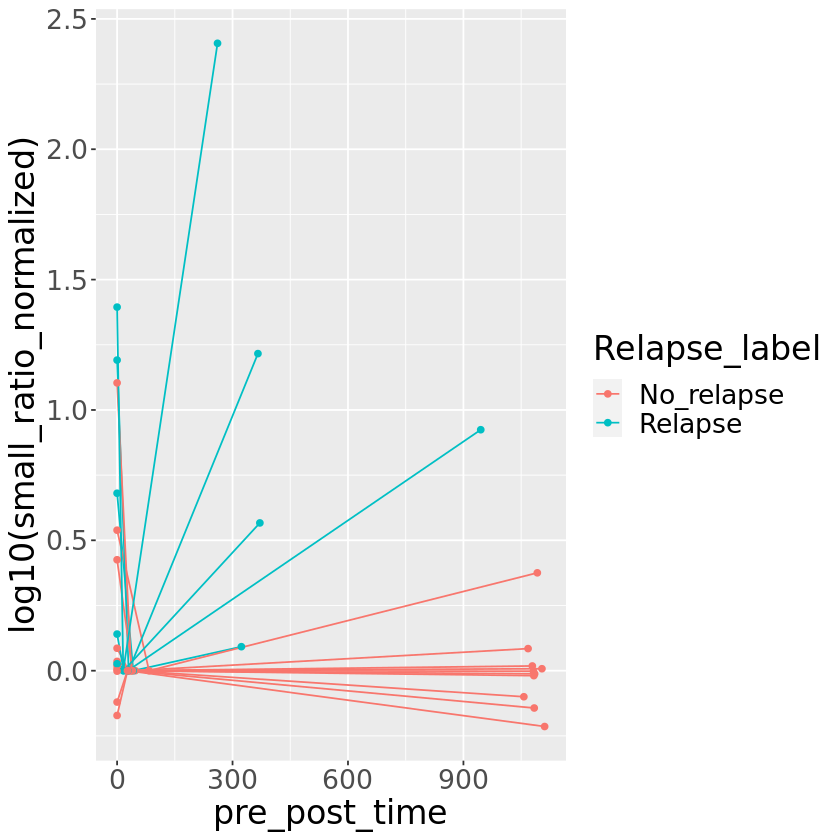

In [70]:
quick_plot_small_r_normalized

In [71]:
quick_plot_big_r <- ggplot(normalized_bt_post_op_res) + 
    geom_line(aes(x = pre_post_time, y = big_ratio, color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = big_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Pre_op_post_op_pre_relapse_Big_", filetype, ".png", sep = ""),
  quick_plot_big_r, dpi = "print")

Saving 6.67 x 6.67 in image


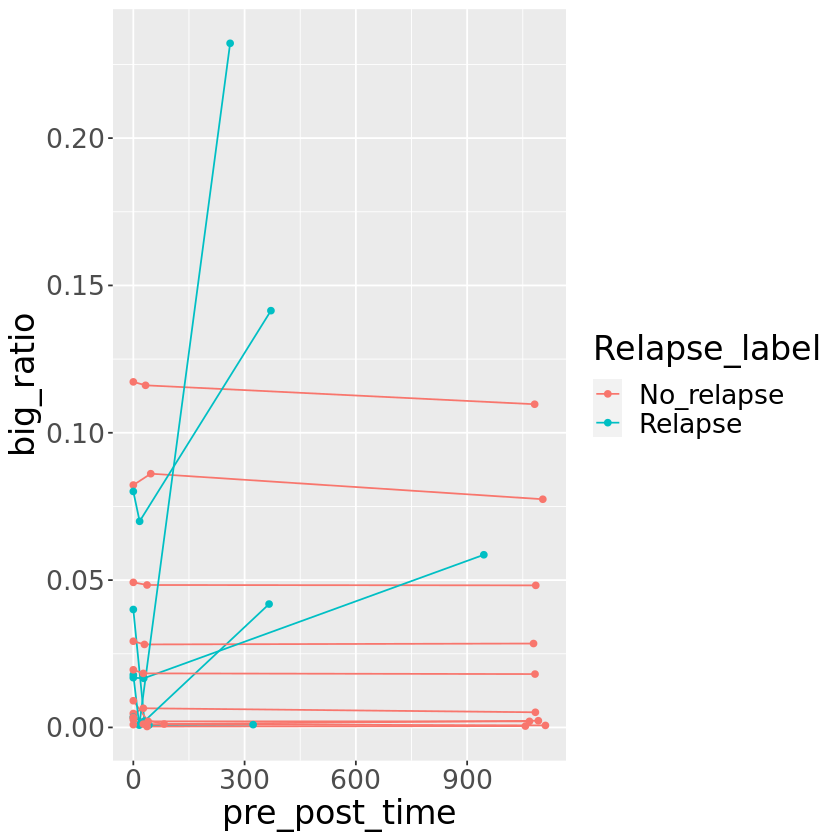

In [72]:
quick_plot_big_r

In [73]:
#quick_plot_big_upper_r <- ggplot(normalized_bt_post_op_res) + 
#    geom_line(aes(x = pre_post_time, y = big_upper_ratio, color = Relapse_label, group=patient_id)) + 
#    geom_point(aes(x = pre_post_time, y = big_upper_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

#ggsave(
#  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Pre_op_post_op_pre_relapse_Big_upper_", filetype, ".png", sep = ""),
#  quick_plot_big_upper_r, dpi = "print")

In [74]:
#quick_plot_big_upper_r

In [75]:
quick_plot_small_r <- ggplot(normalized_bt_post_op_res) + 
    geom_line(aes(x = pre_post_time, y = small_ratio, color = Relapse_label, group=patient_id)) + 
    geom_point(aes(x = pre_post_time, y = small_ratio, color = Relapse_label)) + theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/pre_post_relapse_plots/Pre_op_post_op_pre_relapse_Small_", filetype, ".png", sep = ""),
  quick_plot_small_r, dpi = "print")

Saving 6.67 x 6.67 in image


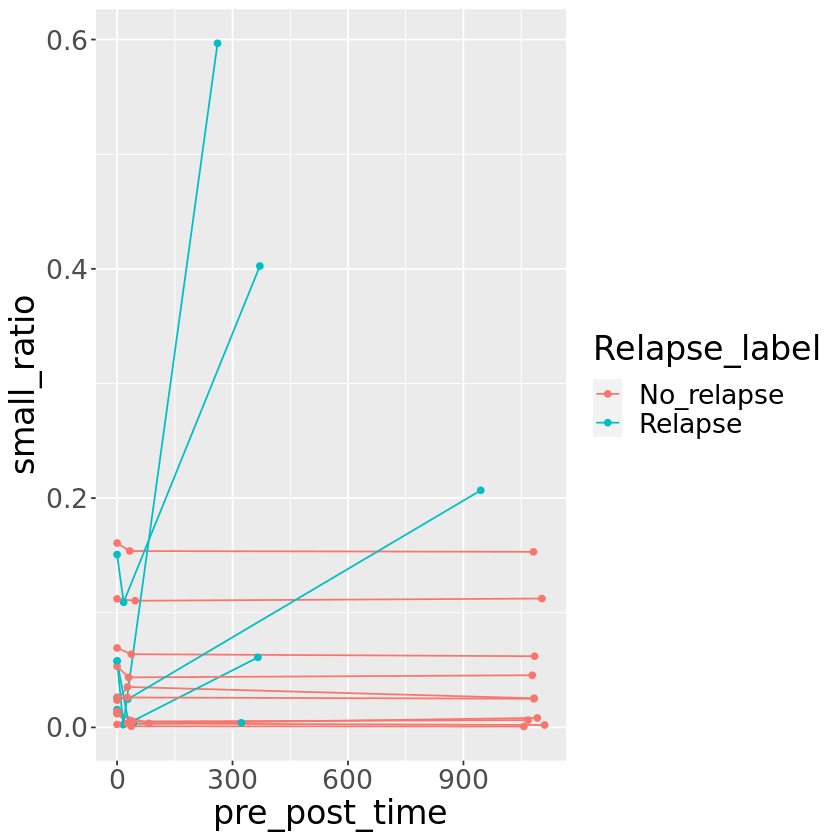

In [76]:
quick_plot_small_r